In [1]:
# Import pandas
import pandas as pd

# Specify the path to your text file
file_path = 'C:\\Users\\User\\SDA490\\VancouverVSCalgaryF'

# Read the text file and create a DataFrame
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
    # Strip newline characters from each line
    lines = [line.strip() for line in lines if line.strip()]

# Create a DataFrame with a single column "text"
df = pd.DataFrame(lines, columns=['text'])

# Display the first few entries to verify
print(df.head())

                                                text
0  Depends why your moving, what stage of life yo...
1  bought a house, got married, had a kid, we wou...
2  besides maybe the wedding. I make a lot more h...
3                              less for my mortgage.
4  Agreed! I was happy in Vancouver as a young ad...


In [2]:
# Strip leading and trailing spaces from the text column
df['text'] = df['text'].str.strip()

# Remove rows where 'text' is empty after stripping spaces
df = df[df['text'] != '']

# Optionally, remove rows with NaN values if any
df.dropna(subset=['text'], inplace=True)

# Replace multiple spaces with a single space
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)

# Display the cleaned DataFrame to verify the changes
print(df.head())

                                                text
0  Depends why your moving, what stage of life yo...
1  bought a house, got married, had a kid, we wou...
2  besides maybe the wedding. I make a lot more h...
3                              less for my mortgage.
4  Agreed! I was happy in Vancouver as a young ad...


In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each post
df['sentiment_scores'] = df['text'].apply(lambda x: sia.polarity_scores(x))
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Determine the overall sentiment based on the compound score
df['overall_sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Example output
print(df[['text', 'overall_sentiment']])

                                                  text overall_sentiment
0    Depends why your moving, what stage of life yo...           neutral
1    bought a house, got married, had a kid, we wou...           neutral
2    besides maybe the wedding. I make a lot more h...          negative
3                                less for my mortgage.           neutral
4    Agreed! I was happy in Vancouver as a young ad...          positive
..                                                 ...               ...
395  Moved to Vancouver from Calgary and now live o...          positive
396  Living in Surrey, looking to take equity (500k...          positive
397  Moved from North Van to Calgary 6 months ago. ...          positive
398  Why not move to small town BC? It's a complete...          positive
399  Loved BC, from Gabriola to Port Hardy to Trail...          positive

[400 rows x 2 columns]


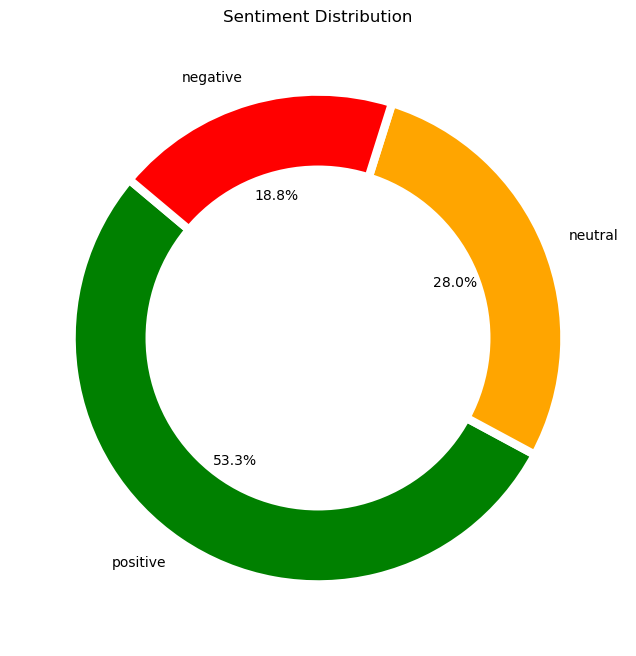

In [4]:
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame and 'overall_sentiment' is the column with sentiment categories
sentiment_counts = df['overall_sentiment'].value_counts()

# Define the colors to match the screenshot example
colors = ['green', 'orange', 'red']  # Adjust the colors to match your desired output

# Create a pie chart with a hole in the middle
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=140,
        wedgeprops={'linewidth': 6, 'edgecolor': 'white'})  # Adjust 'linewidth' to control the size of the hole

# Draw a circle at the center of pie to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Sentiment Distribution')
plt.show()

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
from collections import Counter

# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['text'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])

# Flatten the list of tokens and count occurrences
all_tokens = [token for sublist in df['tokens'].tolist() for token in sublist]
token_counts = Counter(all_tokens)

# Display the most common terms
print(token_counts.most_common(50))

[('calgary', 173), ('vancouver', 121), ('much', 58), ('like', 53), ('years', 51), ('people', 48), ('bc', 48), ('get', 47), ('city', 43), ('live', 42), ('would', 35), ('time', 34), ('good', 34), ('living', 33), ('really', 33), ('back', 33), ('moved', 32), ('great', 30), ('alberta', 28), ('also', 27), ('better', 27), ('way', 27), ('lot', 25), ('school', 25), ('life', 24), ('family', 24), ('place', 24), ('never', 23), ('things', 22), ('less', 22), ('different', 22), ('one', 22), ('house', 21), ('lived', 21), ('bad', 21), ('move', 21), ('winter', 20), ('ago', 19), ('expensive', 19), ('think', 19), ('kids', 18), ('even', 18), ('know', 18), ('yes', 18), ('food', 18), ('go', 18), ('work', 16), ('mountains', 16), ('went', 16), ('made', 16)]


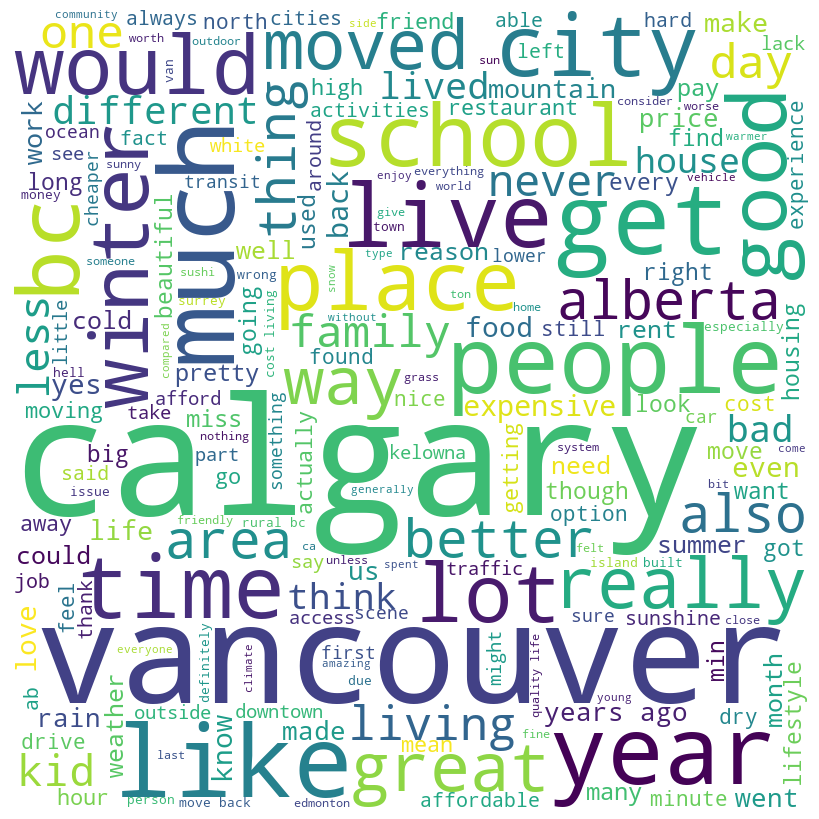

In [11]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(' '.join(all_tokens))

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [6]:

# Now you have labeled_comments with each line and its label
import pandas as pd

# Function to label comments based on keywords
def label_comment(comment, calgary_keywords, vancouver_keywords):
    if any(keyword.lower() in comment.lower() for keyword in calgary_keywords):
        return 'Calgary'
    elif any(keyword.lower() in comment.lower() for keyword in vancouver_keywords):
        return 'Vancouver'
    else:
        return 'Unknown'

# Keywords for each city
calgary_keywords = ['Calgary', 'Alberta', 'Rockies']
vancouver_keywords = ['Vancouver', 'British Columbia', 'BC', 'Pacific', 'rain forest']

file_path = 'C:\\Users\\User\\SDA490\\VancouverVSCalgaryF'

# Read the file and create a list of comments
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Strip whitespace and filter out empty lines
comments = [line.strip() for line in lines if line.strip()]

# Label each comment
labeled_comments = [(comment, label_comment(comment, calgary_keywords, vancouver_keywords)) for comment in comments]

# Convert to a DataFrame for easier manipulation and viewing
df_labeled = pd.DataFrame(labeled_comments, columns=['Comment', 'City'])

# Output the labeled comments to a CSV file
output_file_path = 'labeled_comments.csv'
df_labeled.to_csv(output_file_path, index=False)

# Print the first few rows of the dataframe to see the output
print(df_labeled.head())


                                             Comment       City
0  Depends why your moving, what stage of life yo...    Unknown
1  bought a house, got married, had a kid, we wou...  Vancouver
2  besides maybe the wedding. I make a lot more h...    Unknown
3                              less for my mortgage.    Unknown
4  Agreed! I was happy in Vancouver as a young ad...  Vancouver


In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to determine sentiment
def determine_sentiment(comment):
    score = sia.polarity_scores(comment)
    if score['compound'] > 0:
        return 'Positive'
    elif score['compound'] < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df_labeled['Sentiment'] = df_labeled['Comment'].apply(determine_sentiment)

# Example: Display sentiment distribution for Vancouver comments
print(df_labeled[df_labeled['City'] == 'Vancouver']['Sentiment'].value_counts())



Positive    34
Negative    16
Neutral     14
Name: Sentiment, dtype: int64


In [8]:
# Display sentiment distribution for Calgary comments
print(df_labeled[df_labeled['City'] == 'Calgary']['Sentiment'].value_counts())


Positive    83
Negative    25
Neutral     23
Name: Sentiment, dtype: int64


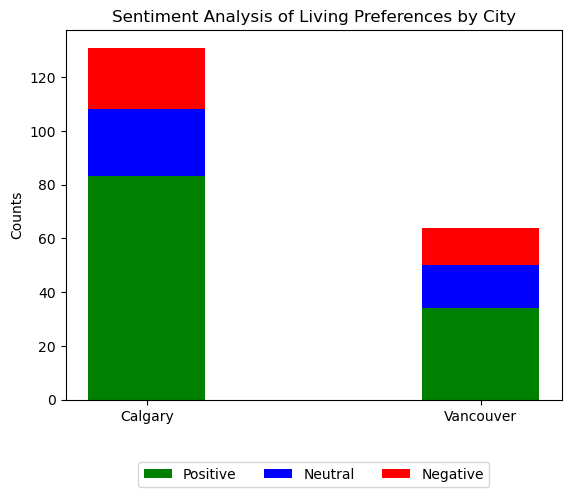

In [9]:
import matplotlib.pyplot as plt
import numpy as np

calgary_counts = [83, 25, 23]
vancouver_counts = [34, 16, 14]
# Data for Calgary and Vancouver
positive = [83, 34]  # Positive counts for Calgary, then Vancouver
neutral = [25, 16]  # Neutral counts
negative = [23, 14]  # Negative counts

# Positions of the bars on the x-axis
ind = np.arange(2)

# Width of the bars
width = 0.35

# Plotting
fig, ax = plt.subplots()

# Stacking the bars for each city
p1 = ax.bar(ind, positive, width, color='green', label='Positive')
p2 = ax.bar(ind, neutral, width, bottom=positive, color='blue', label='Neutral')
p3 = ax.bar(ind, negative, width, bottom=np.array(positive)+np.array(neutral), color='red', label='Negative')

# Adding labels and title
ax.set_ylabel('Counts')
ax.set_title('Sentiment Analysis of Living Preferences by City')

# Setting the x-ticks and x-tick labels
ax.set_xticks(ind)
ax.set_xticklabels(['Calgary', 'Vancouver'])

# Adding the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
# Display the graph
plt.show()


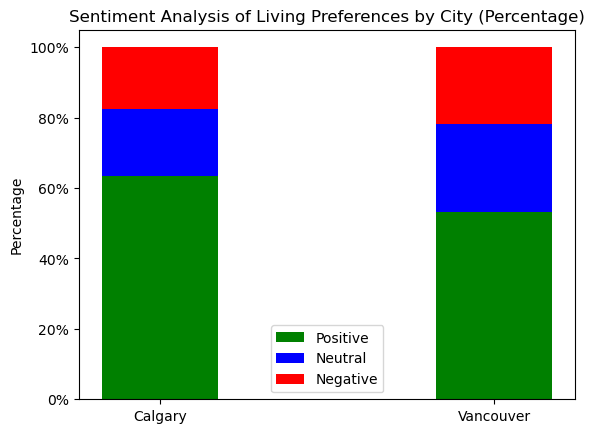

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Counts for Calgary and Vancouver
calgary_counts = [83, 25, 23]
vancouver_counts = [34, 16, 14]

# Calculate the total counts for each city
total_calgary = sum(calgary_counts)
total_vancouver = sum(vancouver_counts)

# Convert counts to percentages
calgary_percentages = [x / total_calgary * 100 for x in calgary_counts]
vancouver_percentages = [x / total_vancouver * 100 for x in vancouver_counts]

# Positions of the bars on the x-axis
ind = np.arange(2)

# Width of each bar
width = 0.35

fig, ax = plt.subplots()

# Stack the bars for each city
bars1 = ax.bar(ind, [calgary_percentages[0], vancouver_percentages[0]], width, label='Positive', color='green')
bars2 = ax.bar(ind, [calgary_percentages[1], vancouver_percentages[1]], width, bottom=[calgary_percentages[0], vancouver_percentages[0]], label='Neutral', color='blue')
bars3 = ax.bar(ind, [calgary_percentages[2], vancouver_percentages[2]], width, bottom=np.add([calgary_percentages[0], vancouver_percentages[0]], [calgary_percentages[1], vancouver_percentages[1]]), label='Negative', color='red')

# Labeling
ax.set_ylabel('Percentage')
ax.set_title('Sentiment Analysis of Living Preferences by City (Percentage)')
ax.set_xticks(ind)
ax.set_xticklabels(('Calgary', 'Vancouver'))
ax.legend()

# Formatting the y-axis to show percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}%'))

plt.show()
